In [2]:
from cpclasses import *

In [3]:
class WigglyPotential():

    def V(self,x):
        return (-1  -np.exp(-((x+15)/10)**2) \
                -2*np.exp(-((x-10)/10)**2) + \
                    -np.exp(-((x-35)/10)**2) \
                -3*np.exp(-((x-60)/10)**2) \
                    -np.exp(-((x-85)/10)**2)\
                -2*np.exp(-((x-110)/10)**2) \
                ) #* \
                #(1+1/5*np.cos(2*np.pi/2.5*x))

    def forces(self,x):
        return -1*np.exp(-((x+15)/10)**2)*2/10*(x+15) \
                -2*np.exp(-((x-10)/10)**2)*2/10*(x-10) \
                -np.exp(-((x-35)/10)**2)*2/10*(x-35) \
                -3*np.exp(-((x-60)/10)**2)*2/10*(x-60) \
                -np.exp(-((x-85)/10)**2)*2/10*(x-85) \
                -2*np.exp(-((x-110)/10)**2)*2/10*(x-110) \
                #*(1+1/5*np.cos(2*np.pi/2.5*x))

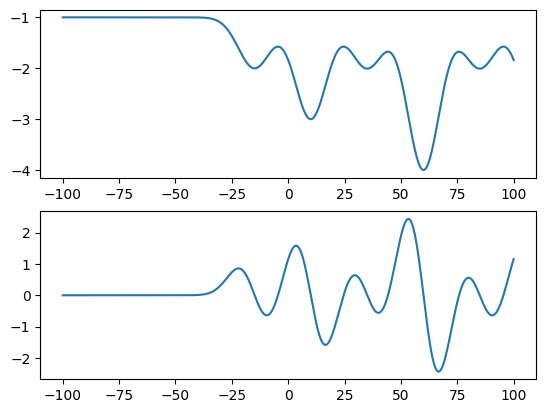

In [4]:
fig, ax = plt.subplots(2,1)

x = np.linspace(-100, 100, 1000)
wp = WigglyPotential()

ax[0].plot(x, wp.V(x))

ax[1].plot(x, wp.forces(x))

In [59]:
def line_search_1d(x0, potential, nsteps=100, tol = 0.01, gbest = None):
    x = x0
    xs = [x]
    gbests = [gbest]

    def energy_of_alpha(alpha,p):
        return potential.V(x + alpha*p)


    for i in range(nsteps):
        f = -potential.forces(x)
        fnorm = np.linalg.norm(f)
        if fnorm < tol:
            break
        p = f/fnorm

        alpha_opt = fmin(lambda alpha: energy_of_alpha(alpha,p), 0.1, disp=False)
        x = x + alpha_opt*p
        xs.append(x)
        if potential.V(x) < potential.V(gbest):
            gbest = x
        gbests += [gbest]
    
    return x, xs, gbests

def bassin_hopping_1d(x0, potential, nsteps=100, delta = 10, T=1):
    x = x0
    gbest = x
    gbests = []
    gbest_V = potential.V(x0)
    xs = [x]
    for i in range(nsteps):
        x_new = x + delta * np.random.randn()
        x_new, xs_new, gbests_line = line_search_1d(x_new, potential, gbest= gbest)
        dV = potential.V(x_new) - potential.V(x)
        if dV < 0 or np.random.rand() < np.exp(-dV/T):
            x = x_new
            xs += xs_new
        gbest = gbests_line[-1]
        gbest_V = potential.V(gbest)
        gbests += gbests_line
    return x, xs, gbests

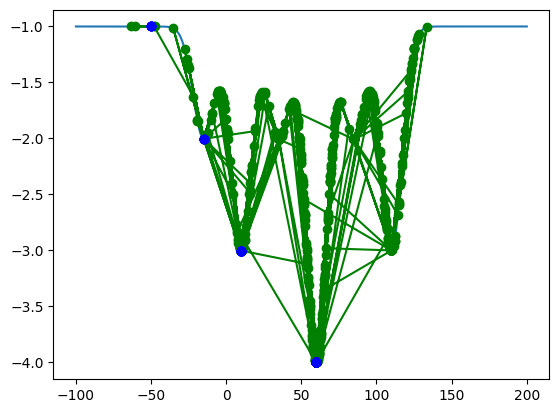

In [61]:
fig, ax = plt.subplots()

x0 = -50

x_linspace = np.linspace(-100, 200, 1000)

ax.plot(x_linspace, wp.V(x_linspace))
ax.plot(x0, wp.V(x0), 'ro') 

x, xs, gbests = bassin_hopping_1d(x0, wp, nsteps=500, delta=20, T=1)

xs_array= np.array([])
for x in xs:
    xs_array = np.append(xs_array, x)

gbests_array = np.array([])
for g in gbests:
    gbests_array = np.append(gbests_array, g)


ax.plot(xs_array, wp.V(xs_array), 'go-')
ax.plot(gbests_array, wp.V(gbests_array), 'bo')

In [62]:
print(len(xs))
print(len(gbests))
print(gbests)

738
985
[-50, -50, -50, -50, -50, array([-14.89885817]), array([-14.89885817]), array([-14.89889661]), array([-14.89889661]), array([10.00000399]), array([10.00000399]), array([10.00000399]), array([10.00000399]), array([10.00000399]), array([10.00000399]), array([10.00000399]), array([10.00000399]), array([10.00000399]), array([10.00000399]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000761]), array([60.00000105]), array([60.00000105]), array([60.00000105]), array([60.00000105]), array([60.00000105]), array([60.00000105]), array([60.00000105]), array([60.000001

In [64]:
def update(i):

    ax.clear()
    ax.set(xlim = (-100,200), xlabel = 'x', ylabel = 'V(x)', title = 'Basin Hopping 1D')
    ax.plot(x_linspace, wp.V(x_linspace))
    
    ax.plot(xs_array[:i], wp.V(xs_array[:i]), 'go', ms = 3)
    ax.plot(xs_array[i], wp.V(xs_array[i]), 'ro')

    ax.plot(gbests_array[i], wp.V(gbests_array[i]), 'o',color = 'magenta', ms = 5, label = 'Global Best')
    ax.legend(loc='lower right')



ani = FuncAnimation(fig, update, frames=len(xs) - 1, repeat=False)
save_animation(ani, 'basin_hopping_1d.gif', fps= 75)